@misc

### Q1

A classification problem involves predicting categorical labels for given input data. Using the Heart Disease dataset, the task is to classify whether a patient has heart disease based on 13 features such as age, sex, chest pain type, resting blood pressure, cholesterol levels, and others. The target variable, num, will be converted to a binary outcome: presence or absence of heart disease.

### Q2

In [20]:
from ucimlrepo import fetch_ucirepo 
  
heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
y = heart_disease.data.targets 
    
print(heart_disease.variables)


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [21]:
import pandas as pd
data = pd.concat([X, y], axis=1)
data.shape

(303, 14)

In [22]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_col = pd.DataFrame(encoder.fit_transform(data[categorical_col]), columns=encoder.get_feature_names_out(categorical_col))

trans_data = pd.concat([data.drop(columns=categorical_col), encoded_col], axis=1)

continuous_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
trans_data[continuous_col] = scaler.fit_transform(data[continuous_col])

In [24]:
trans_data.head()

,age,trestbps,chol,thalach,oldpeak,ca,num,sex_1,cp_2,cp_3,cp_4,fbs_1,restecg_1,restecg_2,exang_1,slope_2,slope_3,thal_6.0,thal_7.0,thal_nan
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,3.0,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,2.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


- Categorical Encoding:
    - Transforming categorical variables into OneHotEncoding representations allows algorithms to process these features effectively.

- Standardization:
    - Scaling continuous variables ensures that features contribute equally to model training, especially for distance-based algorithms.

### Q3

In [25]:
data_info = data.info()
data_descrip = data.describe(include='all')
data_distr = data['num'].value_counts()

print(data_info)

print(data_descrip)

print(data_distr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

In [26]:
trans_data_info = trans_data.info()
trans_data_descrip = trans_data.describe(include='all')
trans_data_distr = trans_data['num'].value_counts()

print(trans_data_info)

print(trans_data_descrip)

print(trans_data_distr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trestbps   303 non-null    float64
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   ca         299 non-null    float64
 6   num        303 non-null    int64  
 7   sex_1      303 non-null    float64
 8   cp_2       303 non-null    float64
 9   cp_3       303 non-null    float64
 10  cp_4       303 non-null    float64
 11  fbs_1      303 non-null    float64
 12  restecg_1  303 non-null    float64
 13  restecg_2  303 non-null    float64
 14  exang_1    303 non-null    float64
 15  slope_2    303 non-null    float64
 16  slope_3    303 non-null    float64
 17  thal_6.0   303 non-null    float64
 18  thal_7.0   303 non-null    float64
 19  thal_nan   303 non-null    float64
dtypes: float64

- Original Dataset (data)
    - The dataset contains 303 observations and 14 variables. 
    - 13 features and 1 target variable num.

- Variable Types:
    - Categorical Variables: sex, cp, fbs, restecg, exang, slope, thal.
    - Numerical Variables: age, trestbps, chol, thalach, oldpeak, ca.

- Data Types:
    - Categorical variables are represented as integers, while continuous variables are represented as integers or floats.

- Target Variable Distribution:
    - The target variable num has 5 unique classes: 0, 1, 2, 3, 4, representing different levels of heart disease severity. 

num

0:    164

1:     55

2:     36

3:     35

4:     13

    - Data in each category is highly unbalanced, we can transform it into a binary classification problem.


- Transformed Dataset (trans_data)
    - The transformed dataset contains 303 observations and 19 variables. The number of variables increases due to the OneHotEncoding of categorical variables.

- Variable Transformation:
    - Categorical Variables: Encoded using OneHotEncoding with the drop='first' parameter to avoid perfect multicollinearity. 

    - Continuous Variables: Standardized using StandardScaler() to have a mean of 0 and a variance of 1, making them suitable for algorithms sensitive to feature scales.

### Q4

In [27]:
trans_data['num'] = trans_data['num'].apply(lambda x: 1 if x > 0 else 0)

### Q5

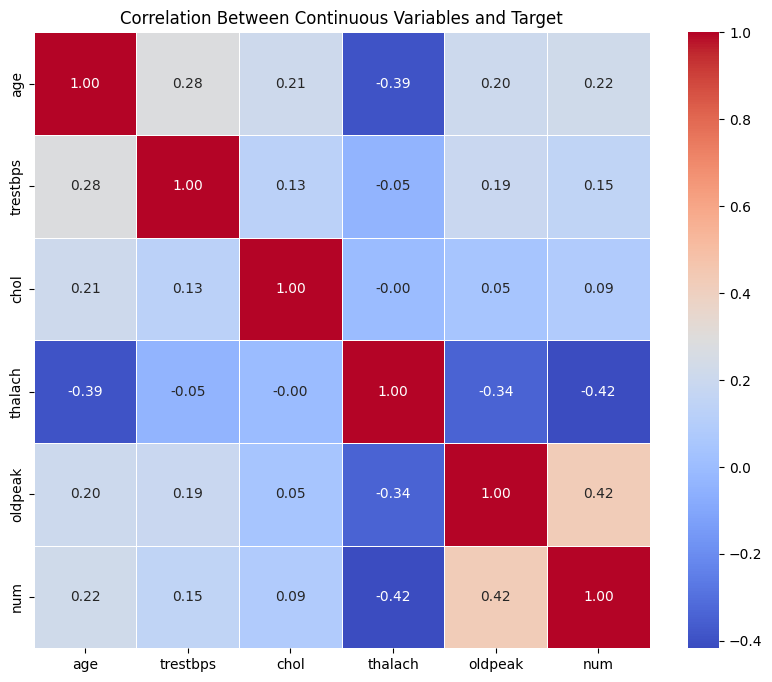

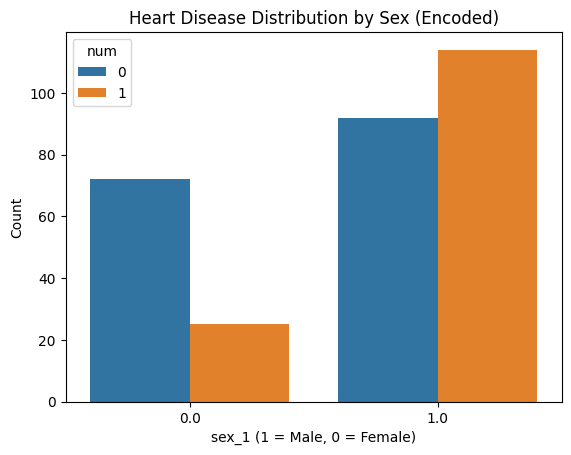

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


continuous_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
corr_matrix = trans_data[continuous_var + ['num']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title("Correlation Between Continuous Variables and Target")
plt.show()

sns.countplot(
    data = trans_data,
    x = 'sex_1',
    hue='num'
)

plt.xlabel("sex_1 (1 = Male, 0 = Female)")
plt.ylabel("Count")
plt.title("Heart Disease Distribution by Sex (Encoded)")
plt.show()

1. Variable 'thalach' is negatively correlated with our target, the presence of heart disease (num), at a correlation=-0.42, while variable 'oldpeak' is positively correlated with the presence of heart disease, at a correlation= 0.42. These findings suggest that both variables are highly useful and informative for predicting the presence of heart disease.

2. The correlation of ‘trestbps’ and ‘chol’  with the target variable is relatively low, indicating they may contribute less to predictive performance.

3. The plot of the 'sex_1' variable shows that males have a higher count of heart disease cases compared to females. This implies that sex is a meaningful and useful feature and may enhance the classification performance.

### Q6

In [29]:
missing_val = trans_data.isnull().sum().sum()
missing_val

np.int64(4)

In [30]:
trans_data_cleaned = trans_data.dropna()
trans_data_cleaned.shape

(299, 20)

### Q7

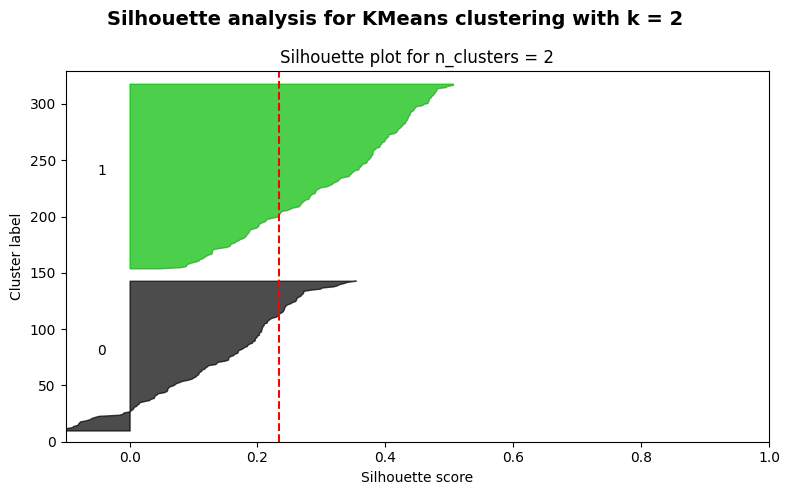

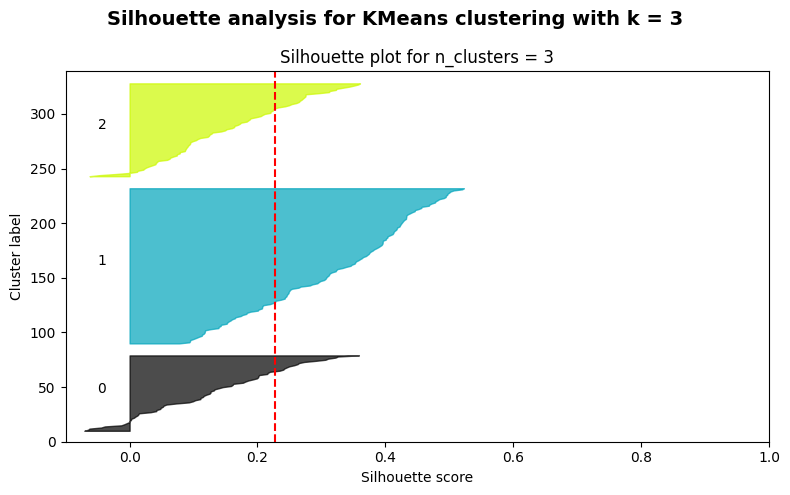

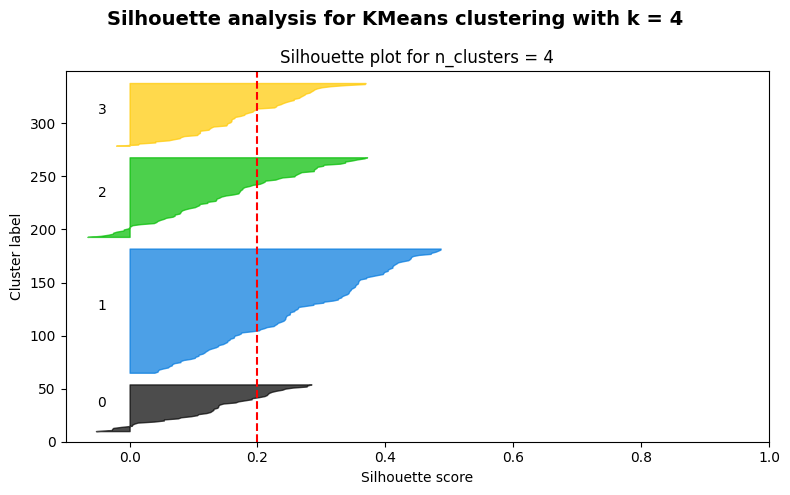

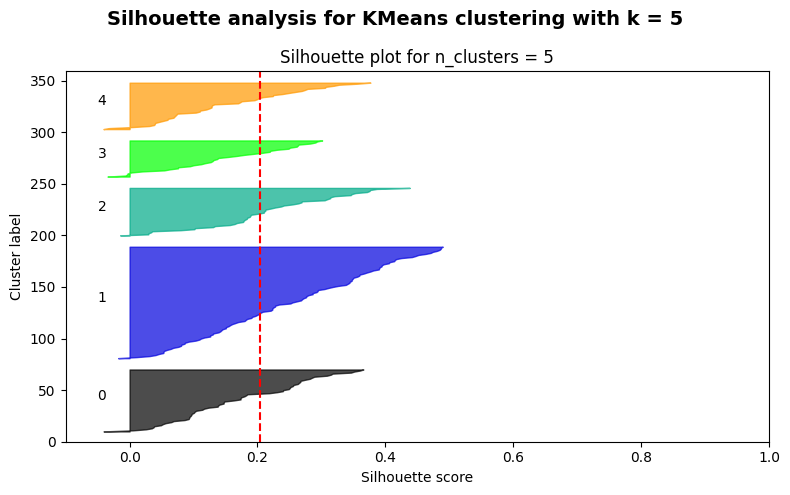

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

X_con = trans_data_cleaned[continuous_var]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_con)
silhouette_scores = []
range_n_clusters = range(2, 6)

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

   
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels_km = km.fit_predict(X_scaled)

    silhouette_avg_km = silhouette_score(X_scaled, cluster_labels_km)
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels_km)
    y_lower = 10
    silhouette_scores.append(silhouette_avg_km)
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    ax1.set_title(f"Silhouette plot for n_clusters = {n_clusters}")
    ax1.set_xlabel("Silhouette score")
    ax1.set_ylabel("Cluster label")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with k = {n_clusters}",
        fontsize=14,
        fontweight="bold"
    )
    plt.tight_layout()
    plt.show()

In [32]:
best_k = range_n_clusters[np.argmax(silhouette_scores)]
best_k

2

In [33]:
km2 = KMeans(n_clusters=best_k, n_init=20, random_state=0)
cluster_labels_km2 = km2.fit_predict(X_scaled)
silhouette_score(X_scaled, cluster_labels_km2).round(2)

np.float64(0.23)

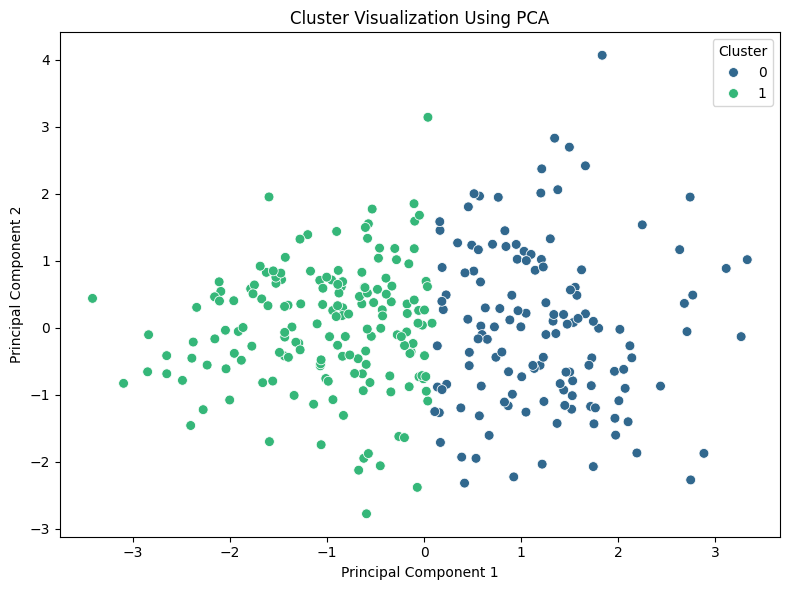

In [34]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=best_k, n_init=20, random_state=0)
pca_X = PCA(n_components=2)

pca_data = pd.DataFrame(pca_X.fit_transform(X_scaled), columns=["PC1", "PC2"])
pca_data["Cluster"] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue=pca_data['Cluster'], palette='viridis', s=50)
plt.title("Cluster Visualization Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

### Q8

In [35]:
from sklearn.model_selection import train_test_split

X = trans_data_cleaned.drop(columns=['num'])
y = trans_data_cleaned['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [36]:
X_train.shape

(209, 19)

In [37]:
X_test.shape[0]

90

### Q9

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logistic_model = LogisticRegression(random_state=1)
random_forest_model = RandomForestClassifier(random_state=1)

The two classifiers I have chosen are Logistic Regression and Random Forest. Logistic Regression is a highly interpretable model that allows for in-depth analysis and inference, fulfilling the classifier requirement. On the other hand, Random Forest is a powerful ensemble model known for its high accuracy and robustness, providing a complementary approach to Logistic Regression.

### Q10

### Accuracy and F1-score

### Q11

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy', n_jobs=-1)
logistic_grid.fit(X_train, y_train)

best_logistic_model = logistic_grid.best_estimator_
best_logistic_params = logistic_grid.best_params_
logistic_best_score = logistic_grid.best_score_

In [41]:
forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

forest_grid = GridSearchCV(random_forest_model, forest_params, cv=5, scoring='accuracy', n_jobs=-1)
forest_grid.fit(X_train, y_train)

best_forest_model = forest_grid.best_estimator_
best_forest_params = forest_grid.best_params_
forest_best_score = forest_grid.best_score_

/opt/anaconda3/envs/stats3da3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stats3da3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/stats3da3/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/stats3da3/lib/python3.9/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_co

In [42]:
print("Best Logistic Regression Parameters:", best_logistic_params)
print("Best Logistic Regression Score (Training):", logistic_best_score)
print("\nBest Random Forest Parameters:", best_forest_params)
print("Best Random Forest Score (Training):", forest_best_score)

Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression Score (Training): 0.8466898954703833

Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Score (Training): 0.8279907084785133
